In [12]:
# Imports
from TweetScraper import Scraper
from AnalysisFunctions import *

# collecting data

In [13]:
stocks_list = ["TSLA","AAPL","NFLX", "GME", "AMC", "RBLX", "AMZN"]

stock_dict = {}

num_pages = 2

for ticker in stocks_list:
    stock_dict[ticker] = Scraper(ticker, num_pages)

# Analyzing Data

In [14]:
# dict of tweets categorized by sentiments. Returns tuple (positive_tweets, negative_tweets, neutral_tweets)
grouped_tweets = {}
overall_sentiments = {}
freq_words = {}


for ticker in stocks_list:
    grouped_tweets[ticker] = vader_sentiment_categorized(stock_dict[ticker].get())
    overall_sentiments[ticker] = vader_overall(stock_dict[ticker].get())
    freq_words[ticker] = popular_words(stock_dict[ticker].get())
    print(f"... saving {ticker} wordcloud to ./wordclouds/{ticker}.png")
    make_wordcloud(stock_dict[ticker].get(),ticker)

... saving TSLA wordcloud to ./wordclouds/TSLA.png
... saving AAPL wordcloud to ./wordclouds/AAPL.png
... saving NFLX wordcloud to ./wordclouds/NFLX.png
... saving GME wordcloud to ./wordclouds/GME.png
... saving AMC wordcloud to ./wordclouds/AMC.png
... saving RBLX wordcloud to ./wordclouds/RBLX.png
... saving AMZN wordcloud to ./wordclouds/AMZN.png


In [15]:
# use case example
print(f"Number of positive tweets for tsla: {len(grouped_tweets['TSLA'][0])}")
print(f"Number of negative tweets for tsla: {len(grouped_tweets['TSLA'][1])}")

print(f"overall sentiment of NFLX: {overall_sentiments['NFLX']}")

print("Top 20 words for GME")
print(freq_words["GME"].most_common(20))


Number of positve tweets for tsla: 42
Number of negative tweets for tsla: 10
overall sentiment of NFLX: 0.08193023255813953
Top 20 words for GME
[('gme', 92), ('ape', 88), ('take', 84), ('let', 46), ('check', 42), ('gmesqueeze', 42), ('blue', 42), ('maybe', 41), ('next', 41), ('chip', 41), ('moon', 41), ('inspired', 41), ('part', 41), ('amc', 37), ('day', 9), ('mother', 8), ('happy', 7), ('market', 7), ('said', 6), ('share', 6)]


# Comparing sentiments of all stocks

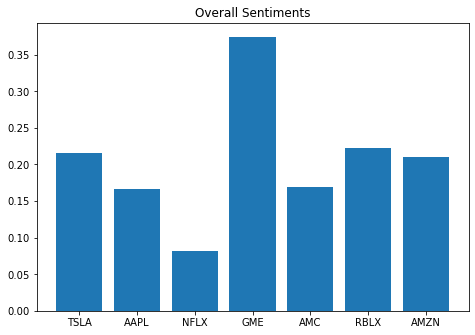

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sents = []
for i in stocks_list:
    sents.append(overall_sentiments[i])
ax.bar(stocks_list,sents)
plt.title("Overall Sentiments")
plt.show()

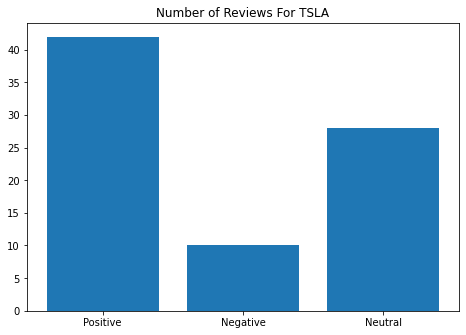

<Figure size 432x288 with 0 Axes>

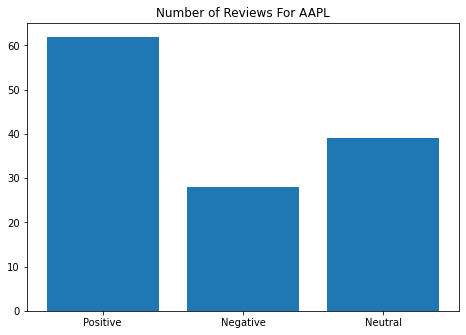

<Figure size 432x288 with 0 Axes>

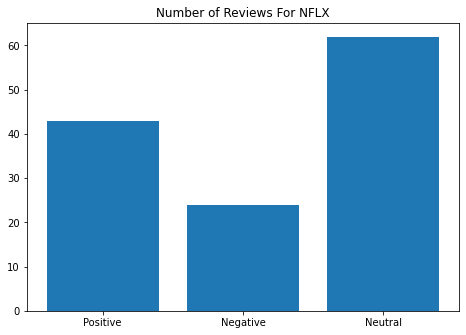

<Figure size 432x288 with 0 Axes>

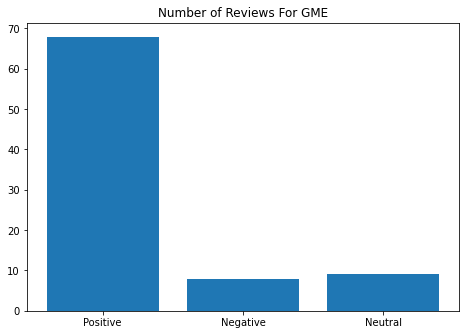

<Figure size 432x288 with 0 Axes>

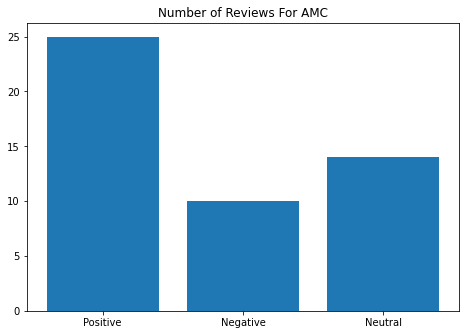

<Figure size 432x288 with 0 Axes>

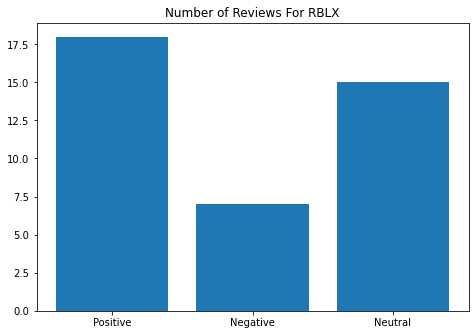

<Figure size 432x288 with 0 Axes>

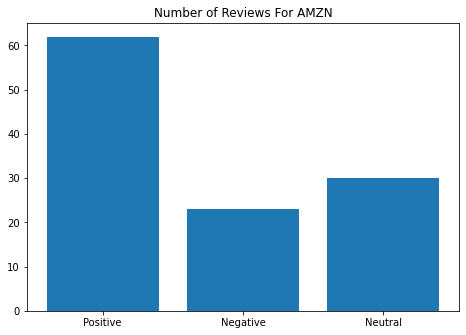

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt


sents = []
for i in stocks_list:
    sents.append(overall_sentiments[i])
    fig = plt.figure()
    numReviews = [len(grouped_tweets[i][0]), len(grouped_tweets[i][1]), len(grouped_tweets[i][2])]
    ax = fig.add_axes([0,0,1,1])
    ax.bar(["Positive", "Negative", "Neutral"],numReviews)
    plt.title("Number of Reviews For " + i)
    plt.show()
    plt.savefig(f"./graphs/{i}")